In [2]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [3]:
print(target)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.4)

In [6]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
27/27 [==============================] - ETA: 0s - loss: 0.7626 - accuracy: 0.5312WARNING:tensorflow:From C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
27/27 [==============================] - 89s 3s/step - loss: 0.7626 - accuracy: 0.5312 - val_loss: 0.6828 - val_accuracy: 0.6421
Epoch 2/20
27/27 [==============================] - 62s 2s/step - loss: 0.6919 - accuracy: 0.5336 - val_loss: 0.6874 - val_accuracy: 0.6421
Epoch 3/20
27/27 [==============================] - 64s 2s/step - loss: 0.6902 - accuracy: 0.5465 - val_l

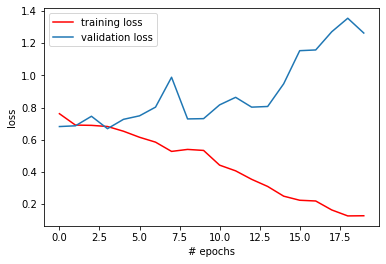

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

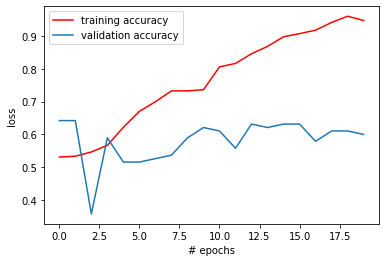

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

20/20 [==============================] - 14s 686ms/step - loss: 1.1252 - accuracy: 0.6302
[1.1252139806747437, 0.6301587224006653]


In [10]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [11]:
from keras.models import load_model

In [12]:
new_model = load_model('saved_model/my_model')

In [13]:
import cv2,os

In [23]:
img_path = 'test/755.jpg'
img_size=100
data=[]
img=cv2.imread(img_path)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(img_size,img_size))
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))

In [24]:
output = new_model.predict(data)

In [25]:
print(output)

[[0.00447709 0.995523  ]]
